# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [96]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [97]:
settings = {"units": "metric", "appid": api_key}
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
cities_df = pd.DataFrame(["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
print("Beginning Data Retrieval")
print("-----------------------------")
counter = 0
weather_data = []
for city in cities:
    try:
        weather_data.append(ow.get_current(city, **settings))
        counter = counter +1
        print(f"Processing Record {counter} of {len(cities)} | {city}")
    except:
        print(f"City not found. Skipping... {city}")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 604 | san roque
Processing Record 2 of 604 | cherskiy
City not found. Skipping... ambodifototra
Processing Record 3 of 604 | rikitea
Processing Record 4 of 604 | torbay
Processing Record 5 of 604 | bluff
Processing Record 6 of 604 | nizhniy kuranakh
Processing Record 7 of 604 | mahebourg
Processing Record 8 of 604 | santa paula
Processing Record 9 of 604 | souillac
Processing Record 10 of 604 | albany
Processing Record 11 of 604 | dingle
Processing Record 12 of 604 | mataura
Processing Record 13 of 604 | vaini
Processing Record 14 of 604 | bethel
City not found. Skipping... saleaula
Processing Record 15 of 604 | punta arenas
Processing Record 16 of 604 | chokurdakh
Processing Record 17 of 604 | vanimo
Processing Record 18 of 604 | ginda
Processing Record 19 of 604 | port alfred
Processing Record 20 of 604 | ushuaia
Processing Record 21 of 604 | killybegs
Processing Record 22 of 604 | roald
Processing Record 2

Processing Record 181 of 604 | fairbanks
Processing Record 182 of 604 | nelson bay
Processing Record 183 of 604 | saldanha
Processing Record 184 of 604 | tessalit
Processing Record 185 of 604 | port macquarie
Processing Record 186 of 604 | tuktoyaktuk
Processing Record 187 of 604 | thunder bay
City not found. Skipping... potgietersrus
Processing Record 188 of 604 | togul
Processing Record 189 of 604 | puerto colombia
Processing Record 190 of 604 | tura
City not found. Skipping... rungata
Processing Record 191 of 604 | sohag
Processing Record 192 of 604 | ilebo
Processing Record 193 of 604 | airai
Processing Record 194 of 604 | chapais
Processing Record 195 of 604 | mount gambier
Processing Record 196 of 604 | balabac
Processing Record 197 of 604 | northam
Processing Record 198 of 604 | vardo
Processing Record 199 of 604 | esperance
City not found. Skipping... magliz
Processing Record 200 of 604 | victoria
Processing Record 201 of 604 | ciudad bolivar
City not found. Skipping... andenes

Processing Record 361 of 604 | huejuquilla el alto
Processing Record 362 of 604 | tonk
Processing Record 363 of 604 | port lincoln
Processing Record 364 of 604 | oktyabrskiy
Processing Record 365 of 604 | harper
Processing Record 366 of 604 | guerrero negro
Processing Record 367 of 604 | asahikawa
Processing Record 368 of 604 | aracuai
Processing Record 369 of 604 | raudeberg
Processing Record 370 of 604 | taoudenni
Processing Record 371 of 604 | harqalah
Processing Record 372 of 604 | teacapan
Processing Record 373 of 604 | guarapari
Processing Record 374 of 604 | mbandaka
Processing Record 375 of 604 | comodoro rivadavia
City not found. Skipping... sakakah
Processing Record 376 of 604 | kuzino
City not found. Skipping... amderma
Processing Record 377 of 604 | koriyama
City not found. Skipping... dolbeau
Processing Record 378 of 604 | diamantino
Processing Record 379 of 604 | naryan-mar
City not found. Skipping... rawannawi
Processing Record 380 of 604 | yeppoon
Processing Record 381 

In [98]:
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
column_names=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]

cities_df = pd.DataFrame(data,columns=column_names)
cities_df["Date"] = pd.to_datetime(cities_df["Date"],unit='s')
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Roque,40,EC,2019-03-17 10:00:00,87,0.30,-78.23,13.00,2.60
1,Cherskiy,8,RU,2019-03-17 10:11:55,37,68.75,161.30,-31.51,1.61
2,Rikitea,80,PF,2019-03-17 10:11:37,100,-23.12,-134.97,25.75,9.61
3,Torbay,90,CA,2019-03-17 10:11:04,100,47.66,-52.73,1.67,3.10
4,Bluff,64,AU,2019-03-17 10:11:44,74,-23.58,149.07,25.92,3.41


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [99]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
cities_df.to_csv(output_data_file)
# Display the DataFrame
cities_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

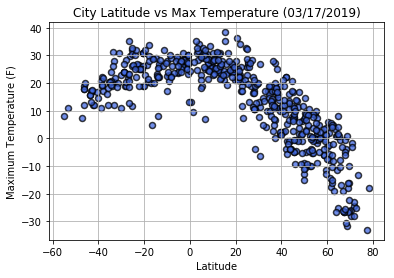

In [100]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeMaxTemp-Scatter.png", bbox_inches='tight')

#### Latitude vs. Humidity Plot

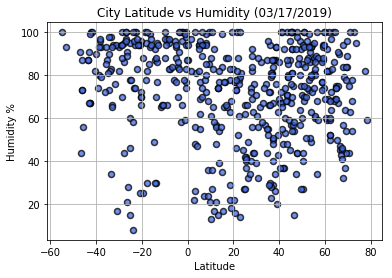

In [101]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeHumidity-Scatter.png", bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

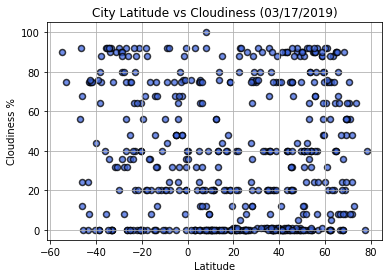

In [102]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeCloudiness-Scatter.png", bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

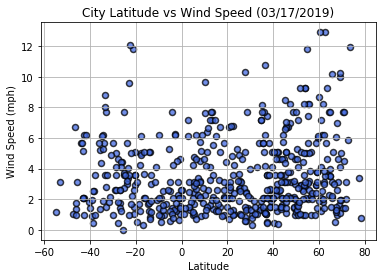

In [103]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeWindSpeed-Scatter.png", bbox_inches='tight')